### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import random
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import classification_report

import numpy as np, warnings
warnings.filterwarnings("ignore") #Ignore warnings

### Ingest and process Data

In [3]:
datatrain = pd.read_csv('data/yeast/yeast-train.csv')
datatest = pd.read_csv('data/yeast/yeast-test.csv')

datatrain.loc[datatrain['Class1'] =="b'0'", 'Class1'] = 0
datatrain.loc[datatrain['Class1'] =="b'1'", 'Class1'] = 1
datatest.loc[datatest['Class1'] =="b'0'", 'Class1'] = 0
datatest.loc[datatest['Class1'] =="b'1'", 'Class1'] = 1

dataset = pd.concat([datatrain, datatest], ignore_index=True)
dataset.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,0.043477,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,-0.055544,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,-0.053756,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,-0.123053,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'1'
4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,-0.111348,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


In [4]:
classNum=1
y_class = 102 + classNum
X = dataset.iloc[:,:103].values
y = dataset.iloc[:,y_class:y_class+1].values
# X_train = datatrain.iloc[:,:103].values
# y_train = datatrain.iloc[:,y_class:y_class+1].values
# X_test = datatest.iloc[:,:103].values
# y_test = datatest.iloc[:,y_class:y_class+1].values


In [5]:
random.seed(0)

In [6]:
#dataset['Class1'].value_counts()
type(X)

numpy.ndarray

In [7]:
# y=np_utils.to_categorical(y, num_classes = 2)
X_train,X_test, y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=0)


In [8]:
print(X_train.shape)
print(X_test.shape)

(1933, 103)
(484, 103)


In [8]:
a = [el/100 for el in range(0,100) ]

### Model

#### XGBoost

In [9]:
# mxa=0
# for i in a:
xgbclassifier = XGBClassifier(learning_rate=0.27)
xgbclassifier.fit(X_train, y_train)
y_pred = xgbclassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
#     if accuracy>mxa:
#         mxa=accuracy
#         print(mxa,i+0.01)

Accuracy: 79.96%


In [10]:
# save model to file
pickle.dump(xgbclassifier, open("models/xgbModelplain.pickle.dat", "wb"))
print("Model Saved...\n")

score = xgbclassifier.score(X_test,y_test)
print("Model Accuracy: " + str(score) + "\n")
predY = xgbclassifier.predict(X_test)

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, predY))

print("\nClassification Report:\n")
print(classification_report(y_test, predY))

Model Saved...

Model Accuracy: 0.7995867768595041

Confusion Matrix:

[[307  23]
 [ 74  80]]

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       330
           1       0.78      0.52      0.62       154

   micro avg       0.80      0.80      0.80       484
   macro avg       0.79      0.72      0.74       484
weighted avg       0.80      0.80      0.79       484



#### SVM

In [11]:
from sklearn.svm import SVC

svmclassifier = SVC(kernel='linear' ,random_state=0)
svmclassifier.fit(X_train,y_train)
y_pred_svm = svmclassifier.predict(X_test)

cm = confusion_matrix(y_test,y_pred_svm)
print(cm)
accuracy=accuracy_score(y_test, y_pred_svm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[311  19]
 [ 85  69]]
Accuracy: 78.51%


In [12]:
# save model to file
pickle.dump(svmclassifier, open("models/svmModelplain.pickle.dat", "wb"))
print("Model Saved...\n")

score = svmclassifier.score(X_test,y_test)
print("Model Accuracy: " + str(score) + "\n")
y_pred_svm = svmclassifier.predict(X_test)

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))

Model Saved...

Model Accuracy: 0.7851239669421488

Confusion Matrix:

[[311  19]
 [ 85  69]]

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       330
           1       0.78      0.45      0.57       154

   micro avg       0.79      0.79      0.79       484
   macro avg       0.78      0.70      0.71       484
weighted avg       0.78      0.79      0.77       484



### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
# mxa = 0
# for i in range(1,50):
rfclassifier = RandomForestClassifier(n_estimators=45,criterion='entropy',random_state=0)
rfclassifier.fit(X_train,y_train)
y_pred_randForest = rfclassifier.predict(X_test)
accuracy=accuracy_score(y_test, y_pred_randForest)
#     if accuracy>mxa:
#         mxa=accuracy
#         print(accuracy,(i*5))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.34%


In [14]:
# save model to file
pickle.dump(rfclassifier, open("models/rfModelplain.pickle.dat", "wb"))
print("Model Saved...\n")

score = rfclassifier.score(X_test,y_test)
print("Model Accuracy: " + str(score) + "\n")
y_pred_randForest = rfclassifier.predict(X_test)

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_randForest))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_randForest))

Model Saved...

Model Accuracy: 0.7933884297520661

Confusion Matrix:

[[320  10]
 [ 90  64]]

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       330
           1       0.86      0.42      0.56       154

   micro avg       0.79      0.79      0.79       484
   macro avg       0.82      0.69      0.71       484
weighted avg       0.81      0.79      0.77       484



### Neural Net

In [1]:
# Packages for training model
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.models import model_from_json
from keras.regularizers import l2
from keras.layers.normalization import BatchNormalization

# Packages for explanation
from keras import backend as K
from keras.models import Model
from deepexplain.tensorflow import DeepExplain
from IPython.display import display, HTML
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [11]:
sgdOptimizer = 'adam'
lossFun='categorical_crossentropy'
finalLayerActivation = 'softmax'
batchSize=25
numEpochs = 500
nb_classes = 2

In [12]:
print(list(dataset.columns),end='')

['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25', 'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33', 'Att34', 'Att35', 'Att36', 'Att37', 'Att38', 'Att39', 'Att40', 'Att41', 'Att42', 'Att43', 'Att44', 'Att45', 'Att46', 'Att47', 'Att48', 'Att49', 'Att50', 'Att51', 'Att52', 'Att53', 'Att54', 'Att55', 'Att56', 'Att57', 'Att58', 'Att59', 'Att60', 'Att61', 'Att62', 'Att63', 'Att64', 'Att65', 'Att66', 'Att67', 'Att68', 'Att69', 'Att70', 'Att71', 'Att72', 'Att73', 'Att74', 'Att75', 'Att76', 'Att77', 'Att78', 'Att79', 'Att80', 'Att81', 'Att82', 'Att83', 'Att84', 'Att85', 'Att86', 'Att87', 'Att88', 'Att89', 'Att90', 'Att91', 'Att92', 'Att93', 'Att94', 'Att95', 'Att96', 'Att97', 'Att98', 'Att99', 'Att100', 'Att101', 'Att102', 'Att103', 'Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6', 'Class7', 'Class8

In [13]:
# Define training data
features = ['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9', 
            'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 
            'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25', 
            'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33', 
            'Att34', 'Att35', 'Att36', 'Att37', 'Att38', 'Att39', 'Att40', 'Att41', 
            'Att42', 'Att43', 'Att44', 'Att45', 'Att46', 'Att47', 'Att48', 'Att49', 
            'Att50', 'Att51', 'Att52', 'Att53', 'Att54', 'Att55', 'Att56', 'Att57', 
            'Att58', 'Att59', 'Att60', 'Att61', 'Att62', 'Att63', 'Att64', 'Att65', 
            'Att66', 'Att67', 'Att68', 'Att69', 'Att70', 'Att71', 'Att72', 'Att73', 
            'Att74', 'Att75', 'Att76', 'Att77', 'Att78', 'Att79', 'Att80', 'Att81', 
            'Att82', 'Att83', 'Att84', 'Att85', 'Att86', 'Att87', 'Att88', 'Att89', 
            'Att90', 'Att91', 'Att92', 'Att93', 'Att94', 'Att95', 'Att96', 'Att97', 
            'Att98', 'Att99', 'Att100', 'Att101', 'Att102', 'Att103']
x_train = dataset[features]
inputDim = len(features)
trainX = x_train

# y_train = dataset['Class1']
# trainY = np_utils.to_categorical(y_train, num_classes = nb_classes)
trainY = np_utils.to_categorical(y_train, num_classes = nb_classes)
testY = np_utils.to_categorical(y_test, num_classes = nb_classes)
# Define model
model = Sequential()
model.add(BatchNormalization(input_shape=(inputDim,)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(nb_classes, activation=finalLayerActivation))
model.compile(loss=lossFun, optimizer=sgdOptimizer, metrics=["accuracy"])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 103)               412       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                3328      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)  

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,trainY.shape,testY.shape,trainX.shape

((1933, 103),
 (484, 103),
 (1933, 1),
 (484, 1),
 (1933, 2),
 (484, 2),
 (2417, 103))

In [15]:
model.fit(X_train,trainY,validation_data=(X_test,testY) ,batch_size=batchSize, epochs=numEpochs, verbose=1)
score = model.evaluate(X_train,trainY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 1933 samples, validate on 484 samples
Epoch 1/500
1933/1933 [==============================] - 16s 8ms/step - loss: 0.8966 - acc: 0.5184 - val_loss: 0.6416 - val_acc: 0.6756
Epoch 2/500
1933/1933 [==============================] - 1s 259us/step - loss: 0.7394 - acc: 0.6048 - val_loss: 0.6263 - val_acc: 0.6818
Epoch 3/500
1933/1933 [==============================] - 0s 256us/step - loss: 0.6837 - acc: 0.6384 - val_loss: 0.6136 - val_acc: 0.6818
Epoch 4/500
1933/1933 [==============================] - 1s 261us/step - loss: 0.6782 - acc: 0.6601 - val_loss: 0.6078 - val_acc: 0.6818
Epoch 5/500
1933/1933 [==============================] - 1s 287us/step - loss: 0.6653 - acc: 0.6580 - val_loss: 0.6018 - val_acc: 0.6818
Epoch 6/500
1933/1933 [==============================] - 0s 256us/step - loss: 0.6379 - acc: 0.6632 - val_loss: 0.5984 - val_acc: 0.6839
Epoch 7/500
1933/1933 [==============================] - 0s 257us/step - loss: 0.637

1933/1933 [==============================] - 0s 248us/step - loss: 0.4011 - acc: 0.8282 - val_loss: 0.5231 - val_acc: 0.7769
Epoch 118/500
1933/1933 [==============================] - 0s 248us/step - loss: 0.4151 - acc: 0.8200 - val_loss: 0.5231 - val_acc: 0.7789
Epoch 119/500
1933/1933 [==============================] - 0s 247us/step - loss: 0.4280 - acc: 0.8117 - val_loss: 0.5109 - val_acc: 0.7748
Epoch 120/500
1933/1933 [==============================] - 0s 251us/step - loss: 0.4098 - acc: 0.8220 - val_loss: 0.5214 - val_acc: 0.7748
Epoch 121/500
1933/1933 [==============================] - 0s 256us/step - loss: 0.4294 - acc: 0.8215 - val_loss: 0.5222 - val_acc: 0.7769
Epoch 122/500
1933/1933 [==============================] - 0s 252us/step - loss: 0.4035 - acc: 0.8215 - val_loss: 0.5339 - val_acc: 0.7789
Epoch 123/500
1933/1933 [==============================] - 0s 248us/step - loss: 0.4086 - acc: 0.8251 - val_loss: 0.5249 - val_acc: 0.7665
Epoch 124/500
1933/1933 [================

1933/1933 [==============================] - 0s 247us/step - loss: 0.3880 - acc: 0.8427 - val_loss: 0.5321 - val_acc: 0.7872
Epoch 177/500
1933/1933 [==============================] - 0s 247us/step - loss: 0.3745 - acc: 0.8464 - val_loss: 0.5373 - val_acc: 0.7769
Epoch 178/500
1933/1933 [==============================] - 0s 247us/step - loss: 0.3929 - acc: 0.8293 - val_loss: 0.5298 - val_acc: 0.7810
Epoch 179/500
1933/1933 [==============================] - 0s 247us/step - loss: 0.3846 - acc: 0.8365 - val_loss: 0.5259 - val_acc: 0.7851
Epoch 180/500
1933/1933 [==============================] - 0s 249us/step - loss: 0.3814 - acc: 0.8391 - val_loss: 0.5387 - val_acc: 0.7851
Epoch 181/500
1933/1933 [==============================] - 0s 248us/step - loss: 0.3916 - acc: 0.8298 - val_loss: 0.5292 - val_acc: 0.7769
Epoch 182/500
1933/1933 [==============================] - 0s 248us/step - loss: 0.3800 - acc: 0.8381 - val_loss: 0.5538 - val_acc: 0.7831
Epoch 183/500
1933/1933 [================

1933/1933 [==============================] - 0s 246us/step - loss: 0.3861 - acc: 0.8438 - val_loss: 0.5421 - val_acc: 0.7934
Epoch 236/500
1933/1933 [==============================] - 0s 248us/step - loss: 0.3755 - acc: 0.8515 - val_loss: 0.5416 - val_acc: 0.7831
Epoch 237/500
1933/1933 [==============================] - 0s 249us/step - loss: 0.3986 - acc: 0.8365 - val_loss: 0.5357 - val_acc: 0.7769
Epoch 238/500
1933/1933 [==============================] - 0s 246us/step - loss: 0.3594 - acc: 0.8557 - val_loss: 0.5471 - val_acc: 0.7789
Epoch 239/500
1933/1933 [==============================] - 0s 253us/step - loss: 0.3775 - acc: 0.8541 - val_loss: 0.5387 - val_acc: 0.7831
Epoch 240/500
1933/1933 [==============================] - 0s 250us/step - loss: 0.3642 - acc: 0.8500 - val_loss: 0.5421 - val_acc: 0.7789
Epoch 241/500
1933/1933 [==============================] - 0s 253us/step - loss: 0.3641 - acc: 0.8386 - val_loss: 0.5376 - val_acc: 0.7727
Epoch 242/500
1933/1933 [================

1933/1933 [==============================] - 0s 252us/step - loss: 0.3640 - acc: 0.8541 - val_loss: 0.5409 - val_acc: 0.7831
Epoch 295/500
1933/1933 [==============================] - 0s 247us/step - loss: 0.3733 - acc: 0.8422 - val_loss: 0.5305 - val_acc: 0.7851
Epoch 296/500
1933/1933 [==============================] - 0s 248us/step - loss: 0.3695 - acc: 0.8495 - val_loss: 0.5385 - val_acc: 0.7831
Epoch 297/500
1933/1933 [==============================] - 0s 247us/step - loss: 0.3530 - acc: 0.8427 - val_loss: 0.5480 - val_acc: 0.7851
Epoch 298/500
1933/1933 [==============================] - 0s 252us/step - loss: 0.3768 - acc: 0.8515 - val_loss: 0.5356 - val_acc: 0.7810
Epoch 299/500
1933/1933 [==============================] - 0s 247us/step - loss: 0.3570 - acc: 0.8603 - val_loss: 0.5429 - val_acc: 0.7851
Epoch 300/500
1933/1933 [==============================] - 0s 248us/step - loss: 0.3648 - acc: 0.8510 - val_loss: 0.5370 - val_acc: 0.7810
Epoch 301/500
1933/1933 [================

1933/1933 [==============================] - 1s 262us/step - loss: 0.3471 - acc: 0.8588 - val_loss: 0.5413 - val_acc: 0.7686
Epoch 354/500
1933/1933 [==============================] - 1s 260us/step - loss: 0.3446 - acc: 0.8645 - val_loss: 0.5465 - val_acc: 0.7624
Epoch 355/500
1933/1933 [==============================] - 0s 258us/step - loss: 0.3594 - acc: 0.8489 - val_loss: 0.5591 - val_acc: 0.7686
Epoch 356/500
1933/1933 [==============================] - 0s 255us/step - loss: 0.3450 - acc: 0.8614 - val_loss: 0.5752 - val_acc: 0.7810
Epoch 357/500
1933/1933 [==============================] - 1s 269us/step - loss: 0.3622 - acc: 0.8567 - val_loss: 0.5620 - val_acc: 0.7789
Epoch 358/500
1933/1933 [==============================] - 0s 258us/step - loss: 0.3588 - acc: 0.8484 - val_loss: 0.5624 - val_acc: 0.7769
Epoch 359/500
1933/1933 [==============================] - 0s 258us/step - loss: 0.3390 - acc: 0.8691 - val_loss: 0.5526 - val_acc: 0.7789
Epoch 360/500
1933/1933 [================

1933/1933 [==============================] - 0s 256us/step - loss: 0.3455 - acc: 0.8583 - val_loss: 0.5498 - val_acc: 0.7810
Epoch 413/500
1933/1933 [==============================] - 0s 256us/step - loss: 0.3459 - acc: 0.8598 - val_loss: 0.5626 - val_acc: 0.7769
Epoch 414/500
1933/1933 [==============================] - 0s 256us/step - loss: 0.3194 - acc: 0.8722 - val_loss: 0.5661 - val_acc: 0.7769
Epoch 415/500
1933/1933 [==============================] - 1s 263us/step - loss: 0.3439 - acc: 0.8572 - val_loss: 0.5584 - val_acc: 0.7789
Epoch 416/500
1933/1933 [==============================] - 0s 256us/step - loss: 0.3459 - acc: 0.8603 - val_loss: 0.5629 - val_acc: 0.7789
Epoch 417/500
1933/1933 [==============================] - 1s 263us/step - loss: 0.3718 - acc: 0.8484 - val_loss: 0.5493 - val_acc: 0.7769
Epoch 418/500
1933/1933 [==============================] - 0s 256us/step - loss: 0.3491 - acc: 0.8598 - val_loss: 0.5660 - val_acc: 0.7686
Epoch 419/500
1933/1933 [================

1933/1933 [==============================] - 0s 253us/step - loss: 0.3321 - acc: 0.8670 - val_loss: 0.5653 - val_acc: 0.7748
Epoch 472/500
1933/1933 [==============================] - 1s 269us/step - loss: 0.3288 - acc: 0.8743 - val_loss: 0.5875 - val_acc: 0.7789
Epoch 473/500
1933/1933 [==============================] - 0s 258us/step - loss: 0.3436 - acc: 0.8670 - val_loss: 0.5652 - val_acc: 0.7748
Epoch 474/500
1933/1933 [==============================] - 0s 250us/step - loss: 0.3333 - acc: 0.8686 - val_loss: 0.5708 - val_acc: 0.7748
Epoch 475/500
1933/1933 [==============================] - 0s 252us/step - loss: 0.3364 - acc: 0.8691 - val_loss: 0.5686 - val_acc: 0.7789
Epoch 476/500
1933/1933 [==============================] - 0s 254us/step - loss: 0.3429 - acc: 0.8551 - val_loss: 0.5615 - val_acc: 0.7707
Epoch 477/500
1933/1933 [==============================] - 0s 248us/step - loss: 0.3363 - acc: 0.8676 - val_loss: 0.5678 - val_acc: 0.7748
Epoch 478/500
1933/1933 [================

In [16]:
score = model.evaluate(X_test,testY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 77.27%


In [78]:
predY = model.predict(X_train)
print("Confusion Matrix:\n")

prediction = model.predict_classes(X_train, verbose=0)
print(confusion_matrix(y_train, prediction))

print("\nClassification Report:\n")
print(classification_report(y_train, prediction))

Confusion Matrix:

[[1311   14]
 [  73  535]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1325
           1       0.97      0.88      0.92       608

   micro avg       0.95      0.95      0.95      1933
   macro avg       0.96      0.93      0.95      1933
weighted avg       0.96      0.95      0.95      1933



In [79]:
with DeepExplain(session=K.get_session()) as de:  # <-- init DeepExplain context
    
    '''
    Need to reconstruct the graph in DeepExplain context, using the same weights.
    1. Get the input tensor
    2. Get embedding tensor
    3. Target the output of the last dense layer (pre-softmax)
    '''
    
    inputTensor = model.layers[0].input
    fModel = Model(inputs=inputTensor, outputs = model.layers[-1].output)
    targetTensor = fModel(inputTensor)
    
    # Sample Data for attribution
#     sampleX = trainX[num:num_next]    
#     ys = trainY[num:num_next]
    
    # Sample Data for attribution
    sampleX = X_train
    ys = trainY
    relevances = de.explain('elrp', targetTensor * ys, inputTensor, sampleX)
    print(relevances.shape)
    
    relFeatures =  ['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9', 
                    'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 
                    'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25', 
                    'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33', 
                    'Att34', 'Att35', 'Att36', 'Att37', 'Att38', 'Att39', 'Att40', 'Att41', 
                    'Att42', 'Att43', 'Att44', 'Att45', 'Att46', 'Att47', 'Att48', 'Att49', 
                    'Att50', 'Att51', 'Att52', 'Att53', 'Att54', 'Att55', 'Att56', 'Att57', 
                    'Att58', 'Att59', 'Att60', 'Att61', 'Att62', 'Att63', 'Att64', 'Att65', 
                    'Att66', 'Att67', 'Att68', 'Att69', 'Att70', 'Att71', 'Att72', 'Att73', 
                    'Att74', 'Att75', 'Att76', 'Att77', 'Att78', 'Att79', 'Att80', 'Att81', 
                    'Att82', 'Att83', 'Att84', 'Att85', 'Att86', 'Att87', 'Att88', 'Att89', 
                    'Att90', 'Att91', 'Att92', 'Att93', 'Att94', 'Att95', 'Att96', 'Att97', 
                    'Att98', 'Att99', 'Att100', 'Att101', 'Att102', 'Att103']
    for i in range(len(relFeatures)):
        word = str(relFeatures[i])
        originalRelevance = "{:8.2f}".format(relevances[0][i])
#         print ("\t\t\t" + str(originalRelevance) + "\t" + word)


(1933, 103)


In [80]:
relDataFrame = pd.DataFrame.from_records(relevances, columns=relFeatures)
# relDataFrame.plot(y=['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9', 
#                     'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 
#                     'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25', 
#                     'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33', 
#                     'Att34', 'Att35', 'Att36', 'Att37', 'Att38', 'Att39', 'Att40', 'Att41', 
#                     'Att42', 'Att43', 'Att44', 'Att45', 'Att46', 'Att47', 'Att48', 'Att49', 
#                     'Att50', 'Att51', 'Att52', 'Att53', 'Att54', 'Att55', 'Att56', 'Att57', 
#                     'Att58', 'Att59', 'Att60', 'Att61', 'Att62', 'Att63', 'Att64', 'Att65', 
#                     'Att66', 'Att67', 'Att68', 'Att69', 'Att70', 'Att71', 'Att72', 'Att73', 
#                     'Att74', 'Att75', 'Att76', 'Att77', 'Att78', 'Att79', 'Att80', 'Att81', 
#                     'Att82', 'Att83', 'Att84', 'Att85', 'Att86', 'Att87', 'Att88', 'Att89', 
#                     'Att90', 'Att91', 'Att92', 'Att93', 'Att94', 'Att95', 'Att96', 'Att97', 
#                     'Att98', 'Att99', 'Att100', 'Att101', 'Att102', 'Att103'], kind='line', figsize=(18,10), grid=True)

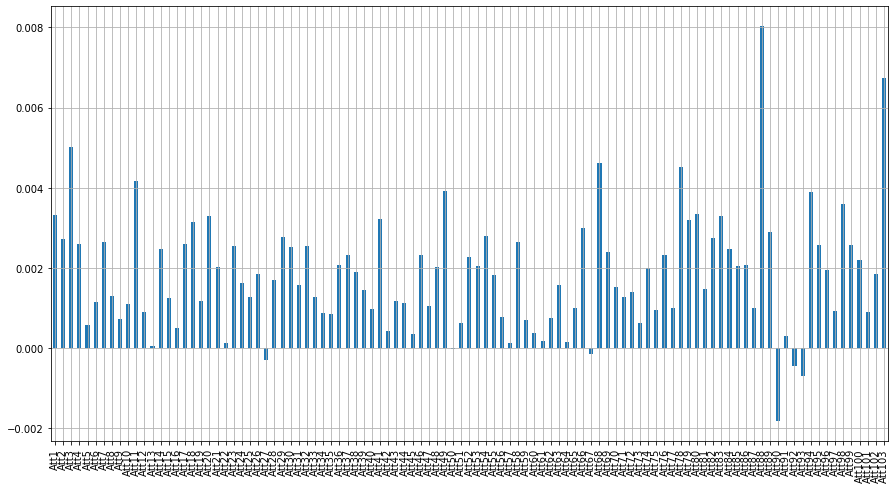

In [81]:
relDataFrame.mean().plot( y=['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9', 
                    'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 
                    'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25', 
                    'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33', 
                    'Att34', 'Att35', 'Att36', 'Att37', 'Att38', 'Att39', 'Att40', 'Att41', 
                    'Att42', 'Att43', 'Att44', 'Att45', 'Att46', 'Att47', 'Att48', 'Att49', 
                    'Att50', 'Att51', 'Att52', 'Att53', 'Att54', 'Att55', 'Att56', 'Att57', 
                    'Att58', 'Att59', 'Att60', 'Att61', 'Att62', 'Att63', 'Att64', 'Att65', 
                    'Att66', 'Att67', 'Att68', 'Att69', 'Att70', 'Att71', 'Att72', 'Att73', 
                    'Att74', 'Att75', 'Att76', 'Att77', 'Att78', 'Att79', 'Att80', 'Att81', 
                    'Att82', 'Att83', 'Att84', 'Att85', 'Att86', 'Att87', 'Att88', 'Att89', 
                    'Att90', 'Att91', 'Att92', 'Att93', 'Att94', 'Att95', 'Att96', 'Att97', 
                    'Att98', 'Att99', 'Att100', 'Att101', 'Att102', 'Att103'], kind='bar', figsize=(15,8), grid=True)